In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Set seed for reproducibility
Faker.seed(42)
np.random.seed(42)

# Define constants
num_entries = 200000
min_age = 22
max_age = 65
min_experience = 0
max_experience = 43  # Assuming a person can start working at age 22 and work up to age 65
min_salary = 30000
max_salary = 200000

# Generate the dataset
ages = np.random.randint(min_age, max_age, size=num_entries)
data = {
    "NAME": [fake.name() for _ in range(num_entries)],
    "AGE": ages,
    "YEARS_OF_EXPERIENCE": [random.randint(min_experience, min(age - 22, max_experience)) for age in ages],
    "CURRENT_SALARY": np.random.randint(min_salary, max_salary, size=num_entries)
}

# Create DataFrame
hr_dataset = pd.DataFrame(data)

# Save to CSV
file_path = "hr_dataset.csv"
hr_dataset.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")


Dataset saved to hr_dataset.csv


Step 1: Generate and Clean the Dataset
First, let's generate the dataset.

In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker
fake = Faker()

# Set seed for reproducibility
Faker.seed(42)
np.random.seed(42)

# Define constants
num_entries = 200000
min_age = 22
max_age = 65
min_experience = 0
max_experience = 43  # Assuming a person can start working at age 22 and work up to age 65
min_salary = 30000
max_salary = 200000

# Generate the dataset
ages = np.random.randint(min_age, max_age, size=num_entries)
data = {
    "NAME": [fake.name() for _ in range(num_entries)],
    "AGE": ages,
    "YEARS_OF_EXPERIENCE": [random.randint(min_experience, min(age - 22, max_experience)) for age in ages],
    "CURRENT_SALARY": np.random.randint(min_salary, max_salary, size=num_entries)
}

# Create DataFrame
hr_dataset = pd.DataFrame(data)

# Drop NAME as it is not relevant for prediction
hr_dataset = hr_dataset.drop(columns=["NAME"])

# Save the raw dataset
hr_dataset.to_csv("hr_dataset_raw.csv", index=False)

# Clean the dataset (here we assume the generated data is already clean, but typically this would involve handling missing values, removing duplicates, etc.)
hr_dataset_cleaned = hr_dataset.copy()

# Save the cleaned dataset
hr_dataset_cleaned.to_csv("hr_dataset_cleaned.csv", index=False)


Step 2: Train a Machine Learning Model
Now, let's train a machine learning model to predict the salary.

In [3]:
# Split the data into training and testing sets
X = hr_dataset_cleaned[["AGE", "YEARS_OF_EXPERIENCE"]]
y = hr_dataset_cleaned["CURRENT_SALARY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model
import joblib
joblib.dump(model, "salary_prediction_model.pkl")


Mean Squared Error: 2407077521.2768517


['salary_prediction_model.pkl']

Step 3: Improve Model Accuracy
To improve the model's accuracy, we can try more sophisticated models and hyperparameter tuning. Here's an example using a Random Forest model:


In [4]:

import pandas as pd
import numpy as np
from faker import Faker
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

# Initialize Faker
fake = Faker()

# Set seed for reproducibility
Faker.seed(42)
np.random.seed(42)

# Define constants
num_entries = 200000
min_age = 22
max_age = 65
min_experience = 0
max_experience = 43  # Assuming a person can start working at age 22 and work up to age 65
min_salary = 30000
max_salary = 200000

# Generate the dataset
ages = np.random.randint(min_age, max_age, size=num_entries)
data = {
    "NAME": [fake.name() for _ in range(num_entries)],
    "AGE": ages,
    "YEARS_OF_EXPERIENCE": [random.randint(min_experience, min(age - 22, max_experience)) for age in ages],
    "CURRENT_SALARY": np.random.randint(min_salary, max_salary, size=num_entries)
}

# Create DataFrame
hr_dataset = pd.DataFrame(data)

# Drop NAME as it is not relevant for prediction
hr_dataset = hr_dataset.drop(columns=["NAME"])

# Save the raw dataset
hr_dataset.to_csv("hr_dataset_raw.csv", index=False)

# Clean the dataset (here we assume the generated data is already clean, but typically this would involve handling missing values, removing duplicates, etc.)
hr_dataset_cleaned = hr_dataset.copy()

# Save the cleaned dataset
hr_dataset_cleaned.to_csv("hr_dataset_cleaned.csv", index=False)

# Split the data into training and testing sets
X = hr_dataset_cleaned[["AGE", "YEARS_OF_EXPERIENCE"]]
y = hr_dataset_cleaned["CURRENT_SALARY"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

# Save the best model
joblib.dump(best_rf, "best_salary_prediction_model.pkl")


Random Forest Mean Squared Error: 2409983257.840321


['best_salary_prediction_model.pkl']

Step 4: Visualize Predictions
Finally, let's visualize the predictions using matplotlib and seaborn.

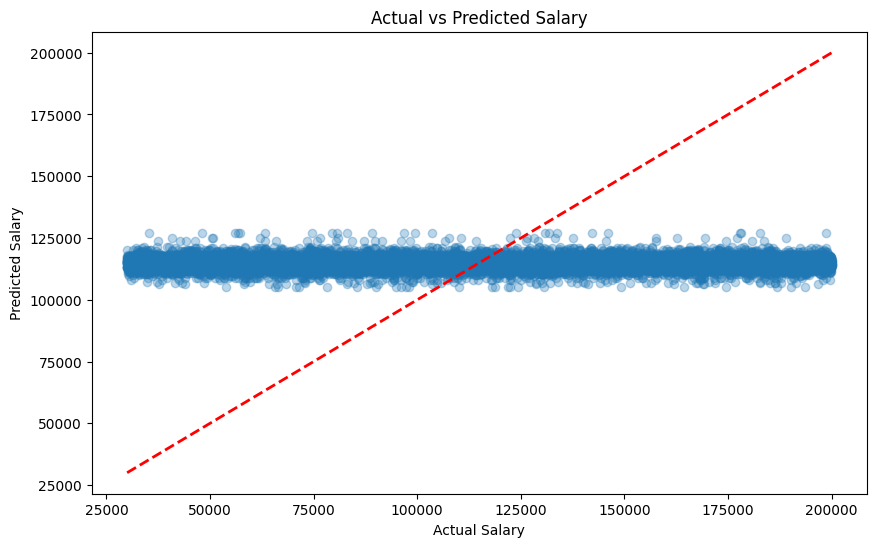

c:\ProgramData\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Salary for Age 30 with 8 years of experience: 110761.90487812951


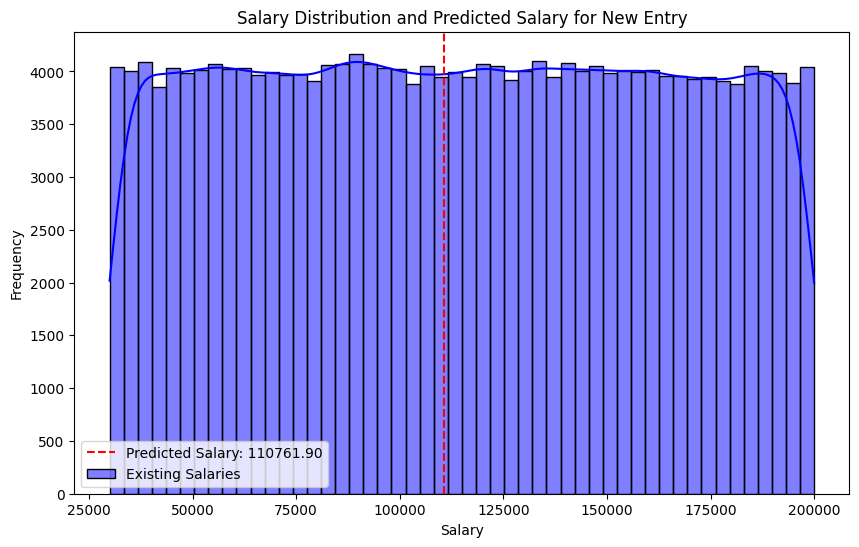

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Function to predict salary for a new entry
def predict_salary(age, years_of_experience):
    return best_rf.predict(np.array([[age, years_of_experience]]))[0]

# Example prediction for a new entry
new_age = 30
new_experience = 8
predicted_salary = predict_salary(new_age, new_experience)
print(f"Predicted Salary for Age {new_age} with {new_experience} years of experience: {predicted_salary}")

# Visualize the prediction for a new entry along with existing entries
plt.figure(figsize=(10, 6))
sns.histplot(hr_dataset_cleaned["CURRENT_SALARY"], bins=50, kde=True, color='blue', label='Existing Salaries')
plt.axvline(predicted_salary, color='red', linestyle='--', label=f'Predicted Salary: {predicted_salary:.2f}')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution and Predicted Salary for New Entry')
plt.legend()
plt.show()